# Feature Extraction

"En este caso, puedes definir una característica por cada palabra, indicando si el documento contiene esa palabra. Para ponerle un número limite de características que el clasificador necesita procesar, se empieza por construir una lista de las 2000 palabras mas frecuentes en el corpus en general"

Fuente: http://www.nltk.org/book/ch06.html

Primero necesitamos hacer una lista de todas las palabras (**Bag of Words**)

Como tengo un objeto de tipo "Series" de pandas, primero necesito convertirlo a una lista, para crear así, una **lista de listas**

## Lectura de CSV

In [1]:
# Importacion de librerias
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import csv
# Permite desplegar el texto completo en Jupyter
pd.set_option('display.max_colwidth', -1)

In [2]:
# Lectura de CSV
data = pd.read_csv("data_lemmatized.csv")
#data.head(20) # Muestra los datos
data_lemmatized = data["data_lemmatized"]
data.keys()

Index(['data_lemmatized', 'sentiment'], dtype='object')

## Series to List

In [3]:
l = data_lemmatized.tolist()
# data_lemmatized_prepared = data_lemmatized.apply(lambda x: ' '.join(x))
# data_lemmatized_prepared

Y crear una lista con todas las palabras, iterando la lista de listas y adjuntandolas a una nueva lista unidimensional

## Bag of Words

In [4]:
# Extraer todas las palabras
all_words = []
for linea in l:
    lista = str(linea).split()
    all_words += lista
    
# Utilizar FreqDist para encontrar las palabras más utilizadas en todos los documentos
all_words_freq = nltk.FreqDist(all_words)

# Y tomar los primeros 2000
word_features = list(all_words_freq)[:2000]

## Feature Extractor: Contador de frecuencia de palabra por texto

In [5]:
# Definir el feature extractor
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

## Conjunto de Entrenamiento

In [6]:
# Conjunto de pruebas
porcentaje = int(len(data_lemmatized) * .20)

In [7]:
train_set, test_set = data[porcentaje:], data[:porcentaje]

# Upsampling

Como apreciaremos acontinuación, hay mucha polaridad a los tweets negativos. Tenemos que estabilizarlo agregando más tweets positivos y neutros. 

Esto es, duplicando ciertos tweets hasta llegar a los mismos que los negativos.

In [8]:
train_set['sentiment'].value_counts(normalize=True)*100

-1    62.192623
 0    21.431011
 1    16.376366
Name: sentiment, dtype: float64

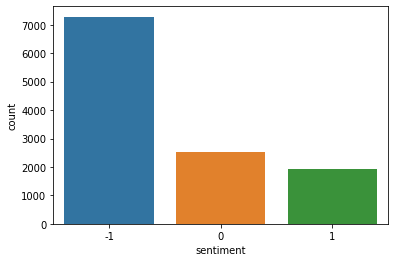

In [9]:
sns.countplot(x="sentiment", data=train_set)

## Resampling con Sklearn

In [10]:
contador_sentimientos = train_set['sentiment'].value_counts()
mayor = contador_sentimientos.max()
#if(contador_sentimientos[-1] )
for items in contador_sentimientos.iteritems():
    if items[1] == mayor:
        sentimiento_mayor = items[0]
        
del(contador_sentimientos[sentimiento_mayor])
lista_contador_sentimientos = contador_sentimientos.keys()

In [11]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = train_set[train_set.sentiment == sentimiento_mayor]
df_minority_1 = train_set[train_set.sentiment == lista_contador_sentimientos[0]]
df_minority_2 = train_set[train_set.sentiment == lista_contador_sentimientos[1]]
 
# Upsample minority class
df_upsampled_1 = resample(df_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=mayor,    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled_2 = resample(df_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=mayor,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([df_majority, df_upsampled_1, df_upsampled_2])
 
# Display new class counts
train_upsampled["sentiment"].value_counts()

-1    7284
 1    7284
 0    7284
Name: sentiment, dtype: int64

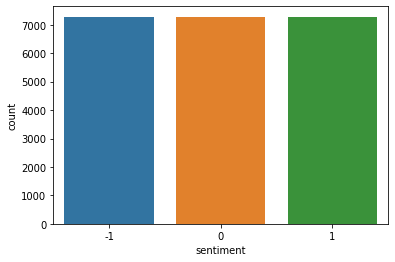

In [12]:
sns.countplot(x="sentiment", data=train_upsampled)

# Conjunto de Entrenamiento y de Prueba para el Feature Extractor

In [13]:
train = train_upsampled.values.tolist()
test = test_set.values.tolist()
train_feature_sets = [(document_features(str(d)), c) for (d,c) in train]
test_feature_sets = [(document_features(str(d)), c) for (d,c) in test]

In [14]:
pd.DataFrame(train_feature_sets).head(1)

,0,1
0,"{'contains(say)': False, 'contains(plus)': False, 'contains(add)': False, 'contains(commercials)': False, 'contains(experience)': False, 'contains(tacky)': False, 'contains(today)': False, 'contains(must)': False, 'contains(mean)': False, 'contains(need)': False, 'contains(take)': False, 'contains(another)': False, 'contains(trip)': False, 'contains(really)': False, 'contains(aggressive)': False, 'contains(blast)': False, 'contains(obnoxious)': False, 'contains(entertainment)': False, 'contains(guests)': False, 'contains(face)': False, 'contains(amp)': False, 'contains(little)': False, 'contains(recourse)': False, 'contains(big)': False, 'contains(bad)': False, 'contains(thing)': False, 'contains(seriously)': False, 'contains(would)': False, 'contains(pay)': False, 'contains(flight)': False, 'contains(seat)': False, 'contains(playingits)': False, 'contains(fly)': False, 'contains(va)': False, 'contains(yes)': False, 'contains(nearly)': False, 'contains(every)': False, 'contains(time)': False, 'contains(vx)': False, 'contains(ear)': False, 'contains(worm)': False, 'contains(go)': False, 'contains(away)': False, 'contains(smiley)': False, 'contains(miss)': False, 'contains(prime)': False, 'contains(opportunity)': False, 'contains(men)': False, 'contains(without)': False, 'contains(hat)': False, 'contains(parody)': False, 'contains(well)': False, 'contains(didntbut)': False, 'contains(amaze)': False, 'contains(arrive)': False, 'contains(hour)': False, 'contains(early)': False, 'contains(youre)': False, 'contains(good)': False, 'contains(know)': False, 'contains(suicide)': False, 'contains(second)': False, 'contains(lead)': False, 'contains(cause)': False, 'contains(death)': False, 'contains(among)': False, 'contains(teens)': False, 'contains(lt)': False, 'contains(pretty)': False, 'contains(graphics)': False, 'contains(much)': False, 'contains(better)': False, 'contains(minimal)': False, 'contains(iconography)': False, 'contains(great)': False, 'contains(deal)': False, 'contains(already)': False, 'contains(think)': False, 'contains(nd)': False, 'contains(even)': False, 'contains(st)': False, 'contains(yet)': False, 'contains(playful)': False, 'contains(sky)': False, 'contains(travel)': False, 'contains(thank)': False, 'contains(sfopdx)': False, 'contains(schedule)': False, 'contains(still)': False, 'contains(action)': False, 'contains(excite)': False, 'contains(first)': False, 'contains(cross)': False, 'contains(country)': False, 'contains(lax)': False, 'contains(mco)': False, 'contains(hear)': False, 'contains(nothing)': False, 'contains(things)': False, 'contains(virgin)': False, ...}",-1


# Entrenamiento

In [15]:
classifier = nltk.NaiveBayesClassifier.train(train_feature_sets)

# Evaluación

In [16]:
print(nltk.classify.accuracy(classifier, test_feature_sets))

0.539275956284153


## Características más informativas

In [17]:
classifier.show_most_informative_features(100)

Most Informative Features
             contains(e) = False               1 : -1     =      5.8 : 1.0
             contains(n) = False               0 : -1     =      2.3 : 1.0
             contains(c) = False               1 : -1     =      1.9 : 1.0
             contains(k) = False               0 : 1      =      1.8 : 1.0
             contains(h) = False               0 : 1      =      1.8 : 1.0
             contains(g) = False               0 : -1     =      1.7 : 1.0
             contains(k) = True                1 : 0      =      1.5 : 1.0
             contains(x) = True               -1 : 0      =      1.5 : 1.0
             contains(v) = True               -1 : 0      =      1.4 : 1.0
             contains(b) = True               -1 : 1      =      1.3 : 1.0
             contains(c) = True               -1 : 1      =      1.3 : 1.0
             contains(q) = True                0 : -1     =      1.3 : 1.0
             contains(b) = False               1 : -1     =      1.3 : 1.0